# Question 1

# CSC2042S Assignment 1: Data Preprocessing

This notebook implements Part 1 (Data Preprocessing) of the assignment. It expects the WDI dataset to be located in `CSC2042S-Assignment1-Data/WDICSV.csv`.

In [17]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

DATA_DIR = Path('CSC2042S-Assignment1-Data')
WDI_PATH = DATA_DIR / 'WDICSV.csv'

In [18]:
def load_wdi_dataset(path: Path) -> pd.DataFrame:
    """Load WDI CSV into tidy format with rows as country-year and columns as indicators."""
    raw = pd.read_csv(path)
    id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code']
    year_cols = [c for c in raw.columns if c.isdigit()]
    tidy = raw.melt(id_vars=id_vars, value_vars=year_cols,
                    var_name='Year', value_name='Value').dropna(subset=['Value'])
    tidy['Year'] = tidy['Year'].astype(int)
    pivot = tidy.pivot_table(index=['Country Name','Country Code','Year'],
                             columns='Indicator Code', values='Value').reset_index()
    return pivot

In [19]:
def preprocess(df: pd.DataFrame, feature_thresh: float=0.3, sample_thresh: float=0.7) -> pd.DataFrame:
    feature_coverage = df.notna().mean()
    df = df.loc[:, feature_coverage >= feature_thresh]
    sample_coverage = df.notna().mean(axis=1)
    df = df.loc[sample_coverage >= sample_thresh]
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    return df

In [20]:
def normalize(df: pd.DataFrame) -> pd.DataFrame:
    scaler = MinMaxScaler()
    numeric = df.select_dtypes(include=[np.number])
    scaled = scaler.fit_transform(numeric)
    df[numeric.columns] = scaled
    return df

In [21]:
def visualize_tsne(df: pd.DataFrame, perplexity: float=30.0, random_state: int=0):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    emb = tsne.fit_transform(df.select_dtypes(include=[np.number]))
    plt.figure(figsize=(6,5))
    plt.scatter(emb[:,0], emb[:,1], s=5)
    plt.title('t-SNE Visualization')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.show()

In [22]:
# Load dataset
data = load_wdi_dataset(WDI_PATH)
print(f'Loaded dataset with shape {data.shape}')
data.head()

Loaded dataset with shape (17225, 1518)


Indicator Code,Country Name,Country Code,Year,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
0,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1961,NaN,0.143791,377500.0,57.878356,7650000.0,0.830251,11.728991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1962,NaN,0.142857,378000.0,57.955016,7700000.0,0.818765,11.805651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1963,NaN,0.141935,378500.0,58.031676,7750000.0,0.806915,11.882311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1964,NaN,0.141026,379050.0,58.116002,7800000.0,0.794757,11.958972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Preprocess dataset
processed = preprocess(data, feature_thresh=0.3, sample_thresh=0.7)
print(f'After preprocessing: {processed.shape}')
processed.head()

After preprocessing: (6679, 752)


Indicator Code,Country Name,Country Code,Year,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,...,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.WR.ZS,TX.VAL.MRCH.XD.WD,TX.VAL.OTHR.ZS.WT,TX.VAL.SERV.CD.WT,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT
48,Afghanistan,AFG,2008,94.179261,1.851685,379160.0,58.132867,7794000.0,0.294306,11.949772,...,73.383361,0.319195,0.000000e+00,540065585.0,73.383361,87.2,78.604126,1.264404e+09,11.702869,1.318369
49,Afghanistan,AFG,2009,108.129575,1.887862,379160.0,58.132867,7793000.0,0.283732,11.948239,...,66.215587,0.719142,-7.387033e-15,403441021.0,66.215587,56.9,82.109162,1.663216e+09,6.982691,2.155533
50,Afghanistan,AFG,2010,115.245883,1.777860,379170.0,58.134400,7793000.0,0.275526,11.948239,...,55.781134,7.126475,0.000000e+00,388483653.0,55.781134,57.2,81.188559,2.097166e+09,9.504463,3.576210
51,Afghanistan,AFG,2011,155.958782,3.827006,379150.0,58.131334,7791000.0,0.265472,11.945173,...,66.805098,7.126475,0.000000e+00,375850943.0,66.805098,62.0,75.821519,2.571297e+09,10.473768,3.311845
52,Afghanistan,AFG,2012,114.088877,2.377852,379140.0,58.129801,7790000.0,0.254908,11.943640,...,88.656204,7.126475,0.000000e+00,305795141.0,88.656204,70.3,71.641482,1.806943e+09,14.210664,5.629446


In [24]:
# Normalize features
normalized = normalize(processed)
normalized.head()

Indicator Code,Country Name,Country Code,Year,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,...,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.WR.ZS,TX.VAL.MRCH.XD.WD,TX.VAL.OTHR.ZS.WT,TX.VAL.SERV.CD.WT,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT
48,Afghanistan,AFG,0.687500,0.000869,0.000331,0.007899,0.678376,0.041976,0.141791,0.161869,...,0.743572,0.003390,3.821516e-14,0.000023,0.743572,0.023088,0.126369,0.000172,0.816570,0.837316
49,Afghanistan,AFG,0.708333,0.000998,0.000337,0.007899,0.678376,0.041970,0.136695,0.161848,...,0.670943,0.007638,3.782262e-14,0.000017,0.670943,0.014941,0.128753,0.000226,0.806764,0.838148
50,Afghanistan,AFG,0.729167,0.001064,0.000317,0.007899,0.678394,0.041970,0.132740,0.161848,...,0.565214,0.075687,3.821516e-14,0.000016,0.565213,0.015022,0.128127,0.000285,0.812003,0.839559
51,Afghanistan,AFG,0.750000,0.001440,0.000683,0.007899,0.678358,0.041959,0.127895,0.161806,...,0.676916,0.075687,3.821516e-14,0.000016,0.676916,0.016313,0.124477,0.000349,0.814016,0.839296
52,Afghanistan,AFG,0.770833,0.001053,0.000425,0.007899,0.678340,0.041954,0.122804,0.161786,...,0.898327,0.075687,3.821516e-14,0.000013,0.898327,0.018544,0.121635,0.000246,0.821780,0.841599


In [25]:
# Save cleaned dataset for Part 2
output_path = DATA_DIR / 'cleaned_data.csv'
normalized.to_csv(output_path, index=False)
print(f'Cleaned data saved to {output_path}')

Cleaned data saved to CSC2042S-Assignment1-Data/cleaned_data.csv


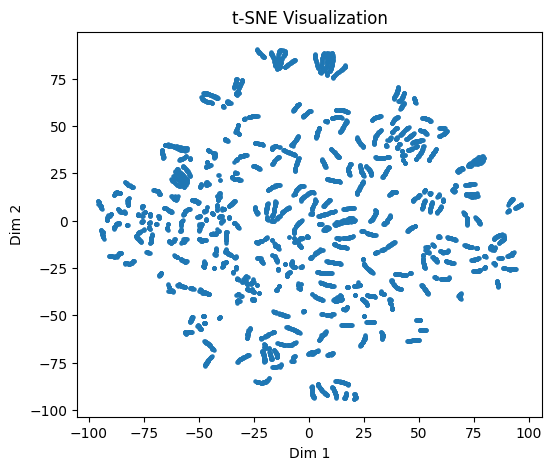

In [26]:
# Visualize with t-SNE
visualize_tsne(normalized.drop(columns=['Country Name','Country Code','Year']))

# Question 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from typing import List, Tuple

In [2]:
def load_dataset(path: str) -> np.ndarray:
    """Load dataset from CSV; generate synthetic data if not available."""
    csv_path = Path(path)
    if csv_path.exists():
        try:
            df = pd.read_csv(csv_path)
            # if file is a git-lfs pointer, it will only have few lines/columns
            if df.shape[1] > 1:
                return df.values.astype(float)
        except Exception:
            pass
    # fallback synthetic data
    rng = np.random.default_rng(0)
    X = np.vstack([
        rng.normal(loc=-2, scale=0.5, size=(100, 2)),
        rng.normal(loc=0, scale=0.5, size=(100, 2)),
        rng.normal(loc=2, scale=0.5, size=(100, 2)),
    ])
    print("Warning: Using synthetic dataset with three clusters.")
    return X

In [3]:
def initialize_centroids(X: np.ndarray, k: int, rng: np.random.Generator, method: str) -> np.ndarray:
    if method == "random":
        indices = rng.choice(X.shape[0], size=k, replace=False)
        return X[indices]
    elif method == "kmeans++":
        centroids = []
        # choose first centroid randomly
        centroids.append(X[rng.integers(0, X.shape[0])])
        for _ in range(1, k):
            dist_sq = np.min(np.linalg.norm(X[:, None, :] - np.array(centroids)[None, :, :], axis=2) ** 2, axis=1)
            probs = dist_sq / dist_sq.sum()
            centroids.append(X[rng.choice(X.shape[0], p=probs)])
        return np.array(centroids)
    else:
        raise ValueError(f"Unknown init method: {method}")

In [4]:
def assign_clusters(X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    distances = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
    return np.argmin(distances, axis=1)

In [5]:
def compute_centroids(X: np.ndarray, labels: np.ndarray, k: int) -> np.ndarray:
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:
            centroids[i] = X[np.random.randint(0, X.shape[0])]
        else:
            centroids[i] = cluster_points.mean(axis=0)
    return centroids

In [6]:
def inertia(X: np.ndarray, labels: np.ndarray, centroids: np.ndarray) -> float:
    return np.sum((X - centroids[labels]) ** 2)

In [7]:
def kmeans(X: np.ndarray, k: int, init: str, max_iters: int = 300, tol: float = 1e-4, seed: int = None) -> Tuple[np.ndarray, np.ndarray, int, List[float]]:
    rng = np.random.default_rng(seed)
    centroids = initialize_centroids(X, k, rng, init)
    history = []
    for it in range(max_iters):
        labels = assign_clusters(X, centroids)
        current_inertia = inertia(X, labels, centroids)
        history.append(current_inertia)
        new_centroids = compute_centroids(X, labels, k)
        shift = np.linalg.norm(new_centroids - centroids)
        centroids = new_centroids
        if shift < tol:
            break
    labels = assign_clusters(X, centroids)
    history.append(inertia(X, labels, centroids))
    return centroids, labels, it + 1, history

In [8]:
def adjusted_rand_index(labels_true: np.ndarray, labels_pred: np.ndarray) -> float:
    # contingency table
    n = len(labels_true)
    labels_true = labels_true.astype(int)
    labels_pred = labels_pred.astype(int)
    classes = np.unique(labels_true)
    clusters = np.unique(labels_pred)
    contingency = np.zeros((len(classes), len(clusters)), dtype=int)
    for i, c in enumerate(classes):
        for j, k in enumerate(clusters):
            contingency[i, j] = np.sum((labels_true == c) & (labels_pred == k))
    sum_comb_c = np.sum([c * (c - 1) // 2 for c in contingency.sum(axis=1)])
    sum_comb_k = np.sum([c * (c - 1) // 2 for c in contingency.sum(axis=0)])
    sum_comb = np.sum([c * (c - 1) // 2 for c in contingency.ravel()])
    total_comb = n * (n - 1) // 2
    expected = sum_comb_c * sum_comb_k / total_comb
    max_index = 0.5 * (sum_comb_c + sum_comb_k)
    return (sum_comb - expected) / (max_index - expected)

In [9]:
def run_experiments(X: np.ndarray, k: int, init: str, runs: int = 5) -> dict:
    results = []
    histories = []
    labels_list = []
    for seed in range(runs):
        centroids, labels, iters, history = kmeans(X, k, init, seed=seed)
        results.append({"seed": seed, "iterations": iters, "final_inertia": history[-1]})
        histories.append(history)
        labels_list.append(labels)
    # compute stability via pairwise ARI
    ari_scores = []
    for i in range(len(labels_list)):
        for j in range(i + 1, len(labels_list)):
            ari_scores.append(adjusted_rand_index(labels_list[i], labels_list[j]))
    stability = float(np.mean(ari_scores)) if ari_scores else float('nan')
    return {"results": results, "histories": histories, "stability": stability}

In [10]:
def plot_histories(histories: List[List[float]], title: str, filename: str):
    plt.figure(figsize=(6, 4))
    for h in histories:
        plt.plot(range(len(h)), h, alpha=0.7)
    plt.xlabel("Iteration")
    plt.ylabel("Inertia")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

In [11]:
data_path = Path("CSC2042S-Assignment1-Data/cleaned_data.csv")
X = load_dataset(data_path)
k = 3
runs = 5

Path("figures").mkdir(exist_ok=True)

random_exp = run_experiments(X, k, init="random", runs=runs)
kpp_exp = run_experiments(X, k, init="kmeans++", runs=runs)

plot_histories(random_exp["histories"], "Random Initialization", "figures/random_init_convergence.png")
plot_histories(kpp_exp["histories"], "K-means++ Initialization", "figures/kmeanspp_init_convergence.png")

print("Random initialization:")
for r in random_exp["results"]:
    print(r)
print("Average ARI stability:", random_exp["stability"])

print("\nK-means++ initialization:")
for r in kpp_exp["results"]:
    print(r)
print("Average ARI stability:", kpp_exp["stability"])

Random initialization:
{'seed': 0, 'iterations': 3, 'final_inertia': np.float64(147.6426766146662)}
{'seed': 1, 'iterations': 4, 'final_inertia': np.float64(147.6426766146662)}
{'seed': 2, 'iterations': 6, 'final_inertia': np.float64(147.6426766146662)}
{'seed': 3, 'iterations': 6, 'final_inertia': np.float64(147.6426766146662)}
{'seed': 4, 'iterations': 5, 'final_inertia': np.float64(147.6426766146662)}
Average ARI stability: 1.0

K-means++ initialization:
{'seed': 0, 'iterations': 6, 'final_inertia': np.float64(147.6426766146662)}
{'seed': 1, 'iterations': 3, 'final_inertia': np.float64(147.6426766146662)}
{'seed': 2, 'iterations': 4, 'final_inertia': np.float64(147.6426766146662)}
{'seed': 3, 'iterations': 3, 'final_inertia': np.float64(147.6426766146662)}
{'seed': 4, 'iterations': 7, 'final_inertia': np.float64(147.6426766146662)}
Average ARI stability: 1.0
